<a href="https://www.kaggle.com/code/qodrinzo/histopathologic-cancer-detection-fastai-v2-7-9?scriptVersionId=109373636" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
!pip install fastai -U

  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.4.0
    Uninstalling typing_extensions-4.4.0:
      Successfully uninstalled typing_extensions-4.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
tensorflow 2.6.4 requires h5py~=3.1.0, but you have h5py 3.7.0 which is incompatible.
tensorflow 2.6.4 requires numpy~=1.19.2, but you have numpy 1.21.6 which is incompatible.
tensorflow 2.6.4 requires tensorboard<2.7,>=2.6.0, but you have tensorboard 2.10.1 which is incompatible.
tensorflow 2.6.4 requires typing-extensions<3.11,>=3.7, but you have typing-extensions 4.1.1 which is incompatible.
tensorflow-transform 1.9.0 requires pyarrow<6,>=1, but you have pyarrow 8.0.0 which is incompatible.
tensorflow-transform 1.9.0 requires te

## 1. Required libraries : import and config

In [3]:
# Python standard libraries
from pathlib import Path
import os

In [4]:
# Data Handling libraries
import numpy as np
import pandas as pd

#  Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
# Configurations
class CONFIG:
    seed = 42

os.environ['PYTHONHASHSEED'] = str(CONFIG.seed)

In [6]:
# ML/DL libraries
from fastai.data.all import *
from fastai.vision.all import *
from sklearn.metrics import roc_curve, auc

# Seed for reproducible results
set_seed(CONFIG.seed)

## 2. Paths

In [7]:
paths = {
    'competition': Path('../input/histopathologic-cancer-detection'),
    'output': Path('/kaggle/working'),
}

paths['train_lbls'] = Path(paths['competition'] / 'train_labels.csv')
paths['train_imgs'] = Path(paths['competition'] / 'train')
paths['test_imgs'] = Path(paths['competition'] / 'test')
paths['models'] = Path(paths['output'] / 'models').mkdir(exist_ok=True)
paths['temp'] = Path(paths['output'] / 'temp').mkdir(exist_ok=True)

## 3. Utils

## 4. Exploring data

In [8]:
train_df = pd.read_csv(paths['train_lbls'])
train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220025 entries, 0 to 220024
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      220025 non-null  object
 1   label   220025 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ MB


,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


<AxesSubplot:xlabel='label', ylabel='count'>

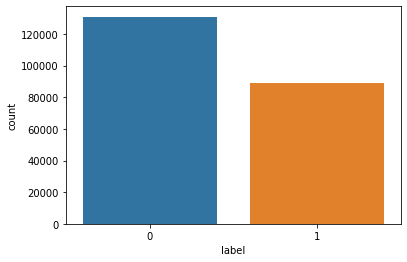

In [9]:
sns.countplot(x='label',data=train_df)

In [10]:
train_imgs = get_image_files(paths['train_imgs'])
print('Number of training images: %s' % len(train_imgs))

Number of training images: 220025


> The original PCam dataset contains duplicate images due to its probabilistic sampling, however, the version presented on Kaggle does not contain duplicates. [— ref](https://www.kaggle.com/competitions/histopathologic-cancer-detection/data)

| image size | channels |
|---|---|
| 96 x 96px | 3 |


In [11]:
# fig = plt.figure(figsize=(20, 4))

# for idx, img in enumerate(np.random.choice(train_imgs , 20)):
#     ax = fig.add_subplot(2, 20//2, idx+1, xticks=[], yticks=[])
#     im = Image.open(train_imgs)
#     plt.imshow(im)

### 4.1. Outliers

## 5. Feature Engineering
### 5.1. One-Hot Encoding
N/A
### 5.2. Binning
N/A
### 5.3. Normalization
by fastai
### 5.4. Standardization
by fastai
### 5.5. Missing features
- [ ] removing the examples
- [ ] compatible algorithm selection
- [ ] Data imputation

## 6. Learning Algoritm Selection

## 7. Planning a good Fit
### 7.1. Underfitting prevention
- [ ] using a more complex model (algorithm?)
- [ ] engineering features with high predictive power

### 7.2. Overfitting prevention
- [ ] using a simpler model (algorithm?)
- [ ] reducing the dimensionality
- [ ] add more training data, if possible
- [ ] regularize the model *(the most widely used approach to prevent overfitting)*

#### 7.2.1. Regularization
- [ ] L1 regularization
- [ ] L2 regularization
- [ ] combined in elastic net regularization ?
- [ ] dropout *(NN)*
- [ ] batch-normalization *(NN)*
- [ ] data augmentation *(non-math)*
- [ ] early stopping *(non-math)*

## 8. Loading datasets

In [12]:
dls = ImageDataLoaders.from_df(
    df=train_df,
    fn_col=0, label_col=1,
    path=paths['competition'],
    folder='train',
    suff='.tif',
    valid_pct=0.2,
    seed=CONFIG.seed,
    batch_tfms=[CropPad(32), Resize(224, ResizeMethod.Squish)]
)

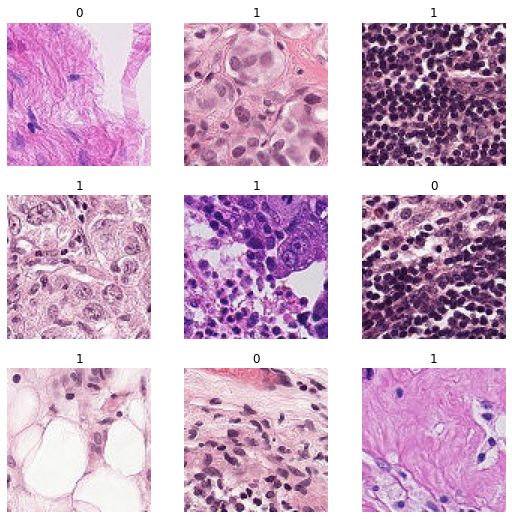

In [13]:
dls.show_batch()

## 9. Learner

Within `vision_learner`, the arguments `normalize` and `pretrained` are set to `True` by default, adding a transform to the `dls` (if there is not already one) using the statistics of the pretrained model. That way, you won’t ever forget to normalize your data in transfer learning. [— ref](https://docs.fast.ai/vision.learner.html#vision_learner)


In [14]:
def getLearner(my_arch, my_metrics):
    "Initiating a learner"
    # In Python, global variables can be used both inside of functions and outside
    return vision_learner(dls=dls, arch=my_arch, metrics=my_metrics,
                          path=paths['output'], model_dir='models')

learn = getLearner(resnet18, RocAucBinary())

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

## 10. Hyperparameter tuning

### 10.1. Learning rate

In [1]:
lr = learn.lr_find(num_it=300, suggest_funcs=(minimum, steep, valley, slide))

NameError: name 'learn' is not defined

### 10.2. Cross-validation
- [ ] if you don't have a descent training (and thus a validation) set.

## 11. Training

The number shown at the end of tqdm description is the train_loss

### 11.1. Transfer learning

In [16]:
# learn.fine_tune(5, 0.00083, cbs=[ShowGraphCallback()])

In [17]:
# learn = getLearner(resnet34, RocAucBinary())
# learn.fine_tune(3, 0.00083, cbs=[ShowGraphCallback()])

In [18]:
learn = getLearner(resnet18, RocAucBinary())
learn.fine_tune(2, lr[2], cbs=[ShowGraphCallback()])

epoch,train_loss,valid_loss,roc_auc_score,time


KeyboardInterrupt: 

### 11.2. From Scratch

In [ ]:
# learn = getLearner(resnet34, RocAucBinary())
# learn.fit_one_cycle(3, 0.00083, cbs=[ShowGraphCallback()])

## 12. Model Performance Assessment

### 12.1 Classification metrics

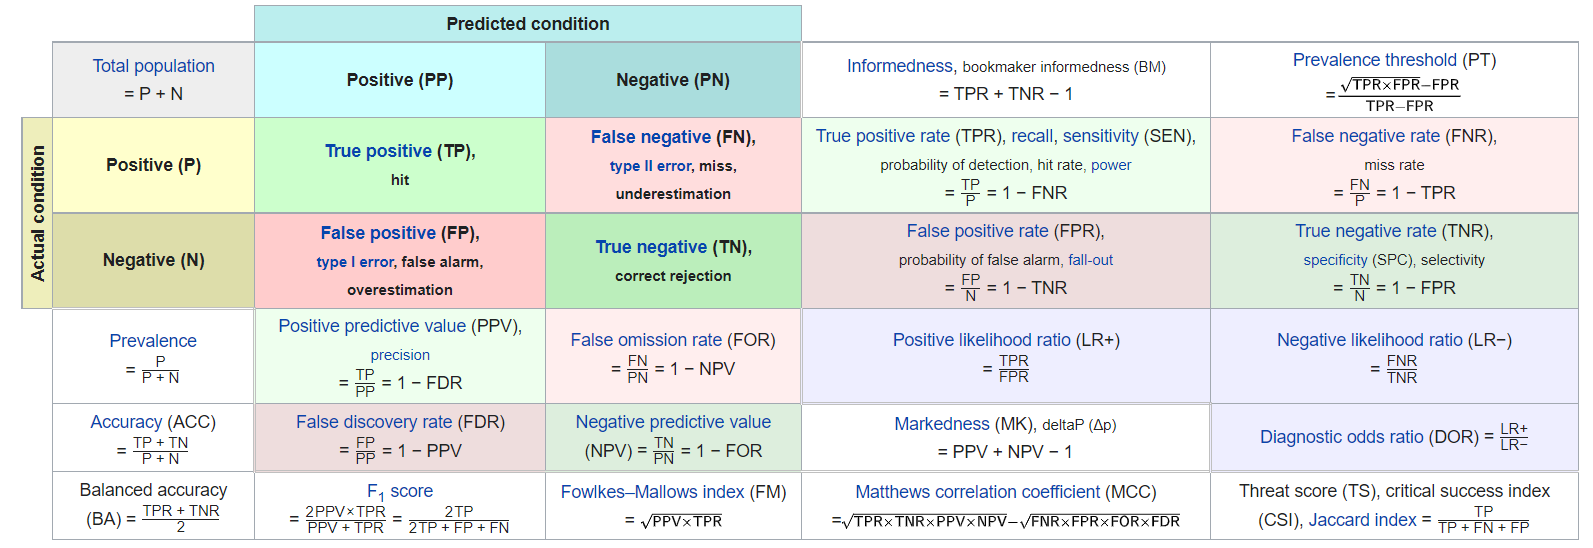
(from [Wikipedia](https://en.wikipedia.org/wiki/F-score#Diagnostic_testing))

#### 12.1.1. Confusion Matrix

In [ ]:
def interp_matrix(learn):
    interp = ClassificationInterpretation.from_learner(learn)
    upp, low = interp.confusion_matrix()

    tn, fp = upp[0], upp[1]
    fn, tp = low[0], low[1]

    specificity = tn/(tn + fp)
    ppv = tp/(tp + fp)
    npv = tn/(tn+fn)

    print('Specificity: %s' % specificity)
    print('Negative predictive value: %s' % npv)

    interp.plot_confusion_matrix()
    
    return {'tp': tp, 'fp': fp, 'tn': tn, 'fn': fn}

confusion_matrix_ = interp_matrix(learn)

#### 12.1.2. Precision/Recall
Q: Which one do you prefer to acheive based on the problem?

A: Here we must not miss the cancers; so we should acheive high recall (i.e., sensitivity).

In [ ]:
print(f"Precision (positive predictive value): {confusion_matrix_['tp']/(confusion_matrix_['tp'] + confusion_matrix_['fp'])}")
print(f"Recall (sensitivity): {confusion_matrix_['tp']/(confusion_matrix_['tp'] + confusion_matrix_['fn'])}")

#### 12.1.3. Accuracy

In [ ]:
print(f"Accuracy: {(confusion_matrix_['tp'] + confusion_matrix_['tn'])/(confusion_matrix_['tp'] + confusion_matrix_['tn'] + confusion_matrix_['fp'] + confusion_matrix_['fn'])}")

#### 12.1.4. Cost-sensitive accuracy
#### 12.1.5. Area under the ROC curve (AUC)

In [ ]:
fpr, tpr, _ = roc_curve(val_labels, probs[:,1], pos_label=1)

# Compute ROC area
roc_auc = auc(fpr, tpr)
print('ROC area is {0}'.format(roc_auc))
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

## 13. Export model
In FastAI, `save`/`load` is [meant for](https://forums.fast.ai/t/saving-and-loading-data-and-models/32464/9?u=qodrinzo) continuation of training and `export`/`load_learner` is for inference.

In [ ]:
# learn.export('')

## 14. Inference

In [ ]:
# learn = load_learner(fname='')

In [ ]:
test_files = get_image_files(test_images_path)
test_dl = learn.dls.test_dl(test_files)
preds = learn.get_preds(dl=test_dl, with_decoded=True)
# print(preds[0])

In [ ]:
# preds = [learn.dls.vocab[i] for i in np.argmax(preds[0], 1)]

In [ ]:
submit_df = pd.DataFrame({'id': [f.stem for f in test_files], 'label': preds[2]})
submit_df.head()

In [ ]:
submit_df.to_csv('submission.csv', header=True, index=False)

In [ ]:
from IPython.display import FileLink
FileLink(r'submission.csv')